# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [36]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib_inline.backend_inline import set_matplotlib_formats

from IPython.display import display
# from IPython import display
set_matplotlib_formats('svg', 'pdf')  # Replace 'svg', 'pdf' with the desired formats


# Gradient descent in 1D

In [20]:
import sympy as sym
import sympy.plotting.plot as symplot

In [29]:
x = sym.symbols('x')

fx = sym.cos(2*sym.pi*x)+x**2
gx = sym.diff(fx)

display(fx)
display(gx)


x**2 + cos(2*pi*x)

2*x - 2*pi*sin(2*pi*x)

In [34]:
# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x)+x**2

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) +2*x

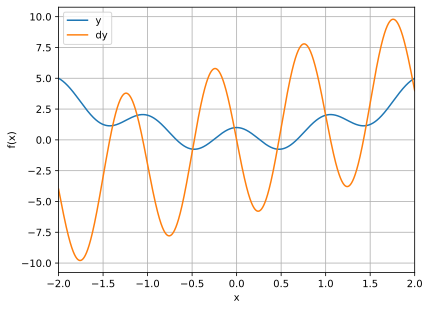

In [43]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [49]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[-1.716]


array([-1.42506741])

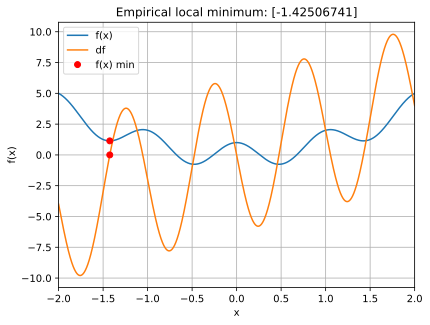

In [50]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin)
plt.show()

# Store the model parameters and outputs on each iteration

In [53]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i][0] = localmin
  modelparams[i][1] = grad


<ipython-input-53-73ebc1ee1113>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i][0] = localmin
<ipython-input-53-73ebc1ee1113>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i][1] = grad


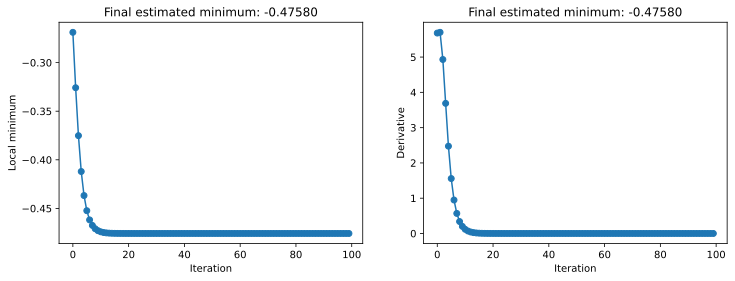

In [54]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Additional explorations

In [ ]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
#
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
#
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative
#    instead of a specified number of training epochs?
#